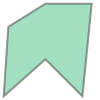

In [13]:
import numpy as np
from matplotlib import pyplot as plt
from shapely.geometry.polygon import LinearRing, Polygon

poly = Polygon([(0.01, 0), (0.02, 0.15), (0.1, 0.2), (0.15, 0.2), 
    (0.2, 0.2), (0.18, 0), (0.1, 0.08), (0.01, 0)])
x,y = poly.exterior.xy

poly

In [18]:
from shapely.geometry import box

bound = box(*[np.min(x), np.min(y), np.max(x), np.max(y)])
print(list(bound.exterior.coords)[:-1])

bx, by = bound.exterior.xy


[(0.2, 0.0), (0.2, 0.2), (0.01, 0.2), (0.01, 0.0)]


(array('d', [0.01, 0.02, 0.1, 0.2, 0.18, 0.01]), array('d', [0.0, 0.15, 0.2, 0.2, 0.0, 0.0]))


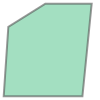

In [19]:
c = poly.convex_hull
print(c.exterior.xy)
c

In [15]:
print(c.centroid)
print(np.mean(c.exterior.xy, axis=1))

POINT (0.1066412213740458 0.09580152671755725)
[0.08666667 0.09166667]


In [116]:
from shapely.ops import triangulate
triangulate(c)

In [117]:
print(list(c.centroid.coords))
cx, cy = c.exterior.xy

print(cx, cy)
print(np.mean(cx), np.mean(cy))

[(0.10663911845730027, 0.08856749311294766)]
(array('d', [0.01, 0.02, 0.2, 0.18, 0.01]), array('d', [0.0, 0.15, 0.2, 0.0, 0.0]))
(0.084, 0.06999999999999999)


In [124]:
cc = np.vstack([cx,cy]).T[:-1]
print(np.hsplit(cc, 2))
# vec = cc-c.centroid.coords[0]
cxy_arr = np.array([cx, cy])

vec_x, vec_y = tuple([cxy_arr[i]-c.centroid.coords[0][i] for i in range(len(cxy_arr))])
print('vx: ',vec_x)

normalize = lambda v: v/np.linalg.norm(v)
vec_x_n, vec_y_n = (normalize(vec_x), normalize(vec_y))

print(vec_x_n, vec_y_n)

[array([[0.01],
       [0.02],
       [0.2 ],
       [0.18]]), array([[0.  ],
       [0.15],
       [0.2 ],
       [0.  ]])]
('vx: ', array([-0.09663912, -0.08663912,  0.09336088,  0.07336088, -0.09663912]))
(array([-0.48149741, -0.43167313,  0.46516383,  0.36551528, -0.48149741]), array([-0.44437455,  0.3082287 ,  0.55909645, -0.44437455, -0.44437455]))


In [121]:
dx = cx + vec_x_n * 0.2
dy = cy + vec_y_n * 0.2

Text(0.5,1,'Polygon')

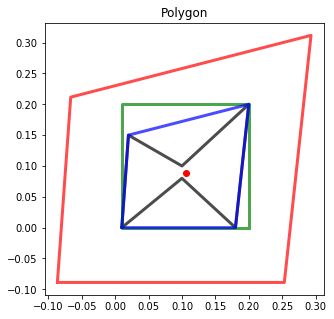

In [122]:
fig = plt.figure(1, figsize=(5,5))
ax = fig.add_subplot(111)
ax.plot(x, y, color='black', alpha=0.7,
    linewidth=3, solid_capstyle='round', zorder=2)

ax.plot(bx, by, color='green', alpha=0.7,
    linewidth=3, solid_capstyle='round', zorder=2)

ax.plot(cx, cy, color='blue', alpha=0.7,
    linewidth=3, solid_capstyle='round', zorder=2)

ax.plot(c.centroid.coords[0][0], c.centroid.coords[0][1], 'ro')

ax.plot(dx, dy, color='red', alpha=0.7,
    linewidth=3, solid_capstyle='round', zorder=2)

ax.set_title('Polygon')

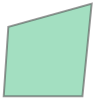

In [105]:
c

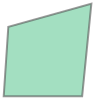

In [108]:
Polygon(np.vstack([dx,dy]).T)

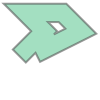

In [11]:
from shapely.geometry import LineString

line = LineString([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])
line.buffer(0.5, cap_style=3, join_style=2)

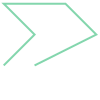

In [8]:
line

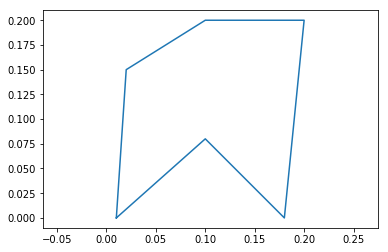

In [28]:
import trimesh.path.polygons as tpp
tpp.plot_polygon(poly)

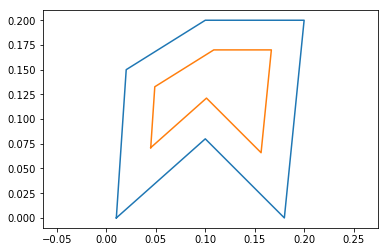

In [36]:
import shapely

mul = shapely.geometry.MultiPolygon([poly, poly.buffer(-0.03, join_style=2)])
tpp.plot_polygon(mul)